In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Same epsilon for the 2 players : Q-learning

## 1- Importation and cleaning

In [4]:
df = pd.read_csv('../final_data/epsilon_q2.csv')
# Function to convert string to list of two numbers using regular expressions
def extract_numbers(text):
    numbers = re.findall(r'-?\d+\.?\d*(?:e[-+]?\d+)?', text)
    return [float(num) for num in numbers]

# Apply the function to the column and convert the strings into lists of two numbers
df['Rewards'] = df['Rewards'].apply(extract_numbers)
df['Prices'] = df['Prices'].apply(extract_numbers)
df['Epsilon'] = df['Epsilon'].apply(extract_numbers)

#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)


#Separate the profits, prices and Epsilon of each player
df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))

#Drop the useless columns
df = df.drop(columns=['Rewards', 'Prices', 'Epsilon'])

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:17: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:18: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))


In [37]:
df

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
0,0,0.002500,1,0.200833,0.280442,1.61950,1.46350,1.000000e+00,1.000000e+00
1,10000,0.002500,1,0.191614,0.294219,1.65850,1.46350,1.392271e-11,1.392271e-11
2,20000,0.002500,1,0.191614,0.294219,1.65850,1.46350,1.933578e-22,1.933578e-22
3,30000,0.002500,1,0.191614,0.294219,1.65850,1.46350,2.685342e-33,2.685342e-33
4,40000,0.002500,1,0.191614,0.294219,1.65850,1.46350,3.729388e-44,3.729388e-44
...,...,...,...,...,...,...,...,...,...
190375,9970000,0.000025,10,0.169348,0.374261,1.85350,1.54150,5.650817e-109,5.650817e-109
190376,9980000,0.000025,10,0.292024,0.362491,1.85350,1.77550,4.400861e-109,4.400861e-109
190377,9990000,0.000025,10,0.372947,0.297938,1.85350,1.93150,3.427394e-109,3.427394e-109
190378,10000000,0.000025,10,0.228329,0.384294,1.85350,1.65850,2.669257e-109,2.669257e-109


In [38]:
df.to_csv('../final_data/res_same_epsilon_final.csv', index=False)

### Separate the dataframe into 2: final for studying the final results and iterations for learning curves

In [6]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]

In [7]:
fin_df = df[df['Iteration']=='last 100 iterations mean']

## 2- Learning curves

In [8]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [33]:
df_beta = lc_df[lc_df['beta']==7.5e-07]
df_beta

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
10020,0,7.500000e-07,1,0.200833,0.280442,1.6195,1.4635,1.000000,1.000000
10021,10000,7.500000e-07,1,0.250056,0.335858,1.7365,1.6195,0.992529,0.992529
10022,20000,7.500000e-07,1,0.199325,0.426934,1.9705,1.6975,0.985113,0.985113
10023,30000,7.500000e-07,1,0.182219,0.272383,1.6195,1.4245,0.977752,0.977752
10024,40000,7.500000e-07,1,0.316564,0.353840,1.8925,1.8535,0.970446,0.970446
...,...,...,...,...,...,...,...,...,...
20034,9960000,7.500000e-07,10,0.286242,0.239705,1.5415,1.6195,0.000570,0.000570
20035,9970000,7.500000e-07,10,0.220409,0.319362,1.6975,1.5415,0.000566,0.000566
20036,9980000,7.500000e-07,10,0.286242,0.239705,1.5415,1.6195,0.000561,0.000561
20037,9990000,7.500000e-07,10,0.334635,0.208639,1.5415,1.7365,0.000557,0.000557


In [34]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

,Iteration,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2,beta
0,0,0.217750,0.306410,1.7326,1.5844,1.000000,1.000000,7.500000e-07
1,10000,0.265938,0.270284,1.6468,1.6663,0.992529,0.992529,7.500000e-07
2,20000,0.266625,0.280616,1.6897,1.6741,0.985113,0.985113,7.500000e-07
3,30000,0.294656,0.259416,1.6624,1.6819,0.977752,0.977752,7.500000e-07
4,40000,0.304937,0.291693,1.7170,1.7482,0.970446,0.970446,7.500000e-07
...,...,...,...,...,...,...,...,...
996,9960000,0.301272,0.297214,1.6858,1.6936,0.000570,0.000570,7.500000e-07
997,9970000,0.293359,0.300721,1.6897,1.6780,0.000566,0.000566,7.500000e-07
998,9980000,0.301272,0.297214,1.6858,1.6936,0.000561,0.000561,7.500000e-07
999,9990000,0.304781,0.289649,1.6741,1.6975,0.000557,0.000557,7.500000e-07


In [35]:
def plot_learning_curve(mean_df, nb_iter):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

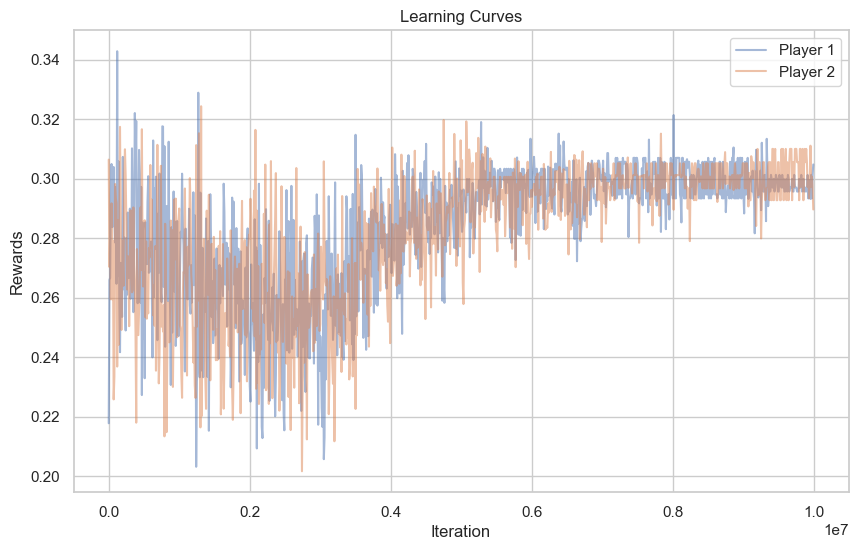

In [36]:
plot_learning_curve(mean_df, 10*(10**(6)))

## 3- Final rewards and prices as a function of beta

In [14]:
fin_df

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
1001,last 100 iterations mean,0.002500,1,0.240028,0.252429,1.65850,1.61170,0.000000e+00,0.000000e+00
2003,last 100 iterations mean,0.002500,2,0.328147,0.266707,1.71154,1.79734,0.000000e+00,0.000000e+00
3005,last 100 iterations mean,0.002500,3,0.245414,0.332801,1.82230,1.67098,0.000000e+00,0.000000e+00
4007,last 100 iterations mean,0.002500,4,0.257962,0.295304,1.73416,1.68112,0.000000e+00,0.000000e+00
5009,last 100 iterations mean,0.002500,5,0.289896,0.250192,1.58050,1.63900,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
186371,last 100 iterations mean,0.000025,6,0.276475,0.276642,1.66357,1.66474,2.672563e-109,2.672563e-109
187373,last 100 iterations mean,0.000025,7,0.274270,0.287037,1.68814,1.67410,2.672563e-109,2.672563e-109
188375,last 100 iterations mean,0.000025,8,0.257217,0.314209,1.75990,1.68970,2.672563e-109,2.672563e-109
189377,last 100 iterations mean,0.000025,9,0.304350,0.271275,1.68190,1.72363,2.672563e-109,2.672563e-109


In [17]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

[1.0e-07 2.5e-07 5.0e-07 7.5e-07 2.5e-06 5.0e-06 7.5e-06 1.0e-05 2.5e-05
 5.0e-05 7.5e-05 1.0e-04 2.5e-04 5.0e-04 7.5e-04 1.0e-03 2.5e-03 5.0e-03
 7.5e-03]


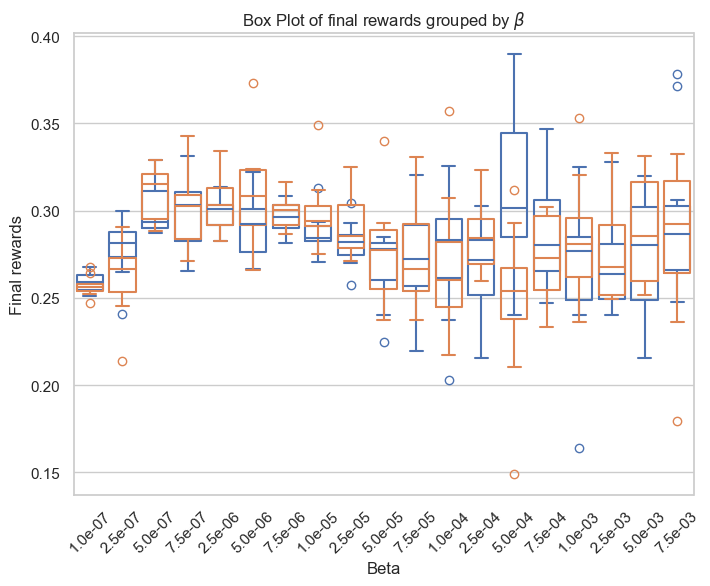

In [18]:
repart_rewards(fin_df)

## For diff $\beta$

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('../final_data/res_diff_epsilon.csv')

In [12]:
df.dtypes

Iteration     object
beta         float64
index          int64
Reward1      float64
Reward2      float64
Price1       float64
Price2       float64
Epsilon1     float64
Epsilon2     float64
dtype: object

In [13]:
#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)

In [14]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]
fin_df = df[df['Iteration']=='last 100 iterations mean']

In [15]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [16]:
df_beta = lc_df[lc_df['beta']==7.5e-07]
df_beta

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
10020,0,7.500000e-07,1,0.200833,0.280442,1.6195,1.4635,1.000000,1.0
10021,10000,7.500000e-07,1,0.333848,0.333848,1.8535,1.8535,0.992529,0.0
10022,20000,7.500000e-07,1,0.192734,0.398695,1.8925,1.6195,0.985113,0.0
10023,30000,7.500000e-07,1,0.318009,0.356136,1.9315,1.8925,0.977752,0.0
10024,40000,7.500000e-07,1,0.343566,0.279607,1.6975,1.7755,0.970446,0.0
...,...,...,...,...,...,...,...,...,...
20034,9960000,7.500000e-07,10,0.413976,0.196496,1.6585,1.9315,0.000570,0.0
20035,9970000,7.500000e-07,10,0.413976,0.196496,1.6585,1.9315,0.000566,0.0
20036,9980000,7.500000e-07,10,0.413976,0.196496,1.6585,1.9315,0.000561,0.0
20037,9990000,7.500000e-07,10,0.413976,0.196496,1.6585,1.9315,0.000557,0.0


In [17]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

,Iteration,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2,beta
0,0,0.217750,0.306410,1.7326,1.5844,1.000000,1.0,7.500000e-07
1,10000,0.227561,0.339105,1.7950,1.6234,0.992529,0.0,7.500000e-07
2,20000,0.255799,0.290456,1.6780,1.6507,0.985113,0.0,7.500000e-07
3,30000,0.284820,0.312693,1.7482,1.7092,0.977752,0.0,7.500000e-07
4,40000,0.229652,0.287158,1.6819,1.5805,0.970446,0.0,7.500000e-07
...,...,...,...,...,...,...,...,...
996,9960000,0.407791,0.221129,1.7092,1.9354,0.000570,0.0,7.500000e-07
997,9970000,0.412385,0.200384,1.6741,1.9432,0.000566,0.0,7.500000e-07
998,9980000,0.405357,0.226669,1.7170,1.9315,0.000561,0.0,7.500000e-07
999,9990000,0.410639,0.214144,1.7014,1.9432,0.000557,0.0,7.500000e-07


In [18]:
def plot_learning_curve(mean_df, nb_iter):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

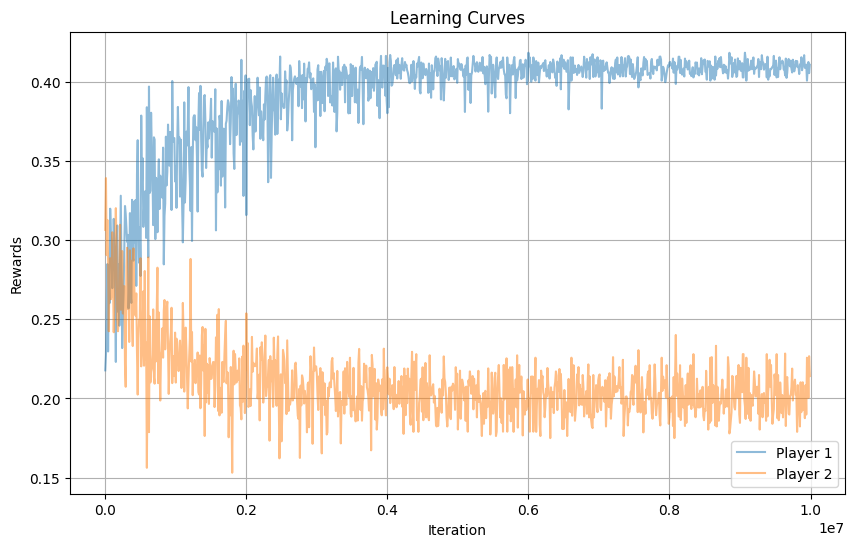

In [19]:
plot_learning_curve(mean_df, 10*(10**(6)))

In [20]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

[1.0e-07 2.5e-07 5.0e-07 7.5e-07 2.5e-06 5.0e-06 7.5e-06 1.0e-05 2.5e-05
 5.0e-05 7.5e-05 1.0e-04 2.5e-04 5.0e-04 7.5e-04 1.0e-03 2.5e-03 5.0e-03
 7.5e-03]


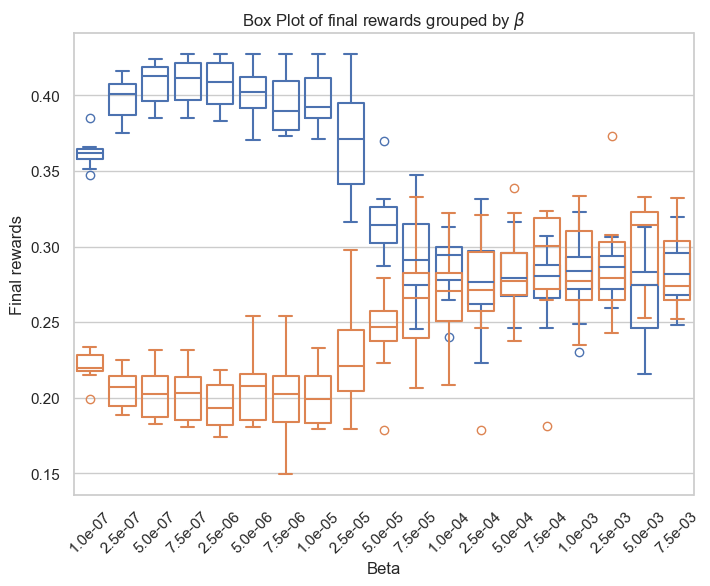

In [21]:
repart_rewards(fin_df)